# Knock Airport Weather

Plot:
- The temperature
- The mean temperature of each day
- The mean temperature of each month
- The windspeed
- The rolling windspeed (over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

In [52]:
# Import the requred modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Information about the file


Write stuff here about the csv file. 

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Cleaning the csv file. Used find and replace ', ' replaced with ','

![Find and replace for csv](img\assignment_6_regex.png)

In [53]:
weather_df = pd.read_csv('data\hly4935.csv', usecols= ['date', 'temp', 'wetb', 'wdsp'], skiprows = 23, index_col= 'date', parse_dates= ['date'], date_format = "%d-%b-%Y %H:%M")
weather_df.head()

,temp,wetb,wdsp
date,,,
1996-04-10 14:00:00,11.5,8.1,0.0
1996-07-31 08:00:00,11.5,11.1,0.0
1996-07-31 09:00:00,11.6,10.7,0.0
1996-07-31 10:00:00,12.9,11.3,0.0
1996-07-31 11:00:00,14.5,10.8,0.0


In [ ]:
#weather_df['date'] = pd.to_datetime(weather_df['date'], format = "%d-%b-%Y %H:%M", utc= True)
#weather_df.head()

,date,temp,wetb,wdsp
0,1996-04-10 14:00:00+00:00,11.5,8.1,0.0
1,1996-07-31 08:00:00+00:00,11.5,11.1,0.0
2,1996-07-31 09:00:00+00:00,11.6,10.7,0.0
3,1996-07-31 10:00:00+00:00,12.9,11.3,0.0
4,1996-07-31 11:00:00+00:00,14.5,10.8,0.0


In [54]:
weather_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246930 entries, 1996-04-10 14:00:00 to 2024-10-01 00:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    246930 non-null  float64
 1   wetb    246930 non-null  float64
 2   wdsp    246880 non-null  float64
dtypes: float64(3)
memory usage: 7.5 MB


In [56]:
weather_df.isna().sum()

temp     0
wetb     0
wdsp    50
dtype: int64

In [57]:
weather_df.shape

(246930, 3)

In [58]:
weather_df.dropna(inplace= True)
weather_df.shape

(246880, 3)

In [59]:
weather_df['wdsp'] = weather_df['wdsp'].astype('int')

In [60]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246880 entries, 1996-04-10 14:00:00 to 2024-10-01 00:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    246880 non-null  float64
 1   wetb    246880 non-null  float64
 2   wdsp    246880 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 6.6 MB


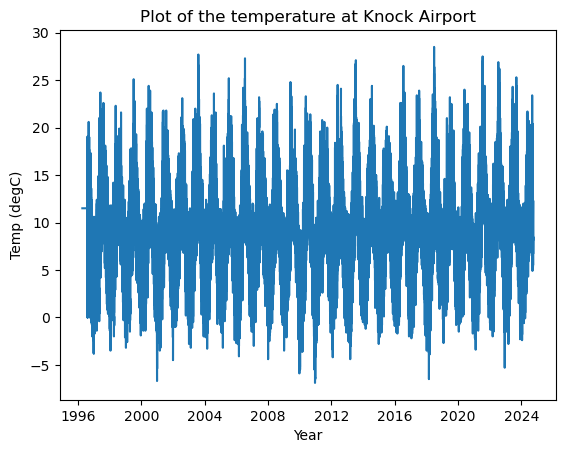

In [64]:
# Plot the temperature.
plt.plot(weather_df['temp'])
plt.title('Plot of the temperature at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temp (degC)')
plt.show()


In [ ]:
# Plot the mean temperature each day

# Use resample to the weather df to daily
daily = weather_df.resample('D')

# Get the mean daily temp.
daily_mean_temp = daily['temp'].mean()
daily_mean_temp

date
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2024-09-27     8.291667
2024-09-28     8.479167
2024-09-29     9.183333
2024-09-30     9.891667
2024-10-01     8.200000
Freq: D, Name: temp, Length: 10402, dtype: float64

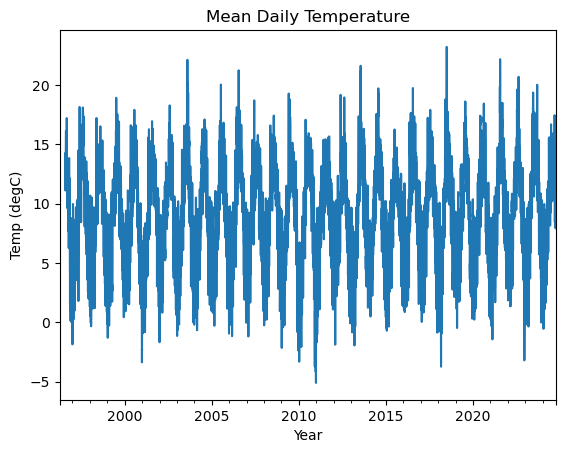

In [67]:
# Plot the daily mean temperature
daily_mean_temp.plot()
plt.xlabel('Year')
plt.ylabel('Temp (degC)')
plt.title('Mean Daily Temperature')
plt.show()

In [68]:
monthly = weather_df.resample('ME')
monthly

In [69]:
monthly_mean_temp = monthly['temp'].mean()
monthly_mean_temp

date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.949798
                ...    
2024-06-30    11.278194
2024-07-31    12.994489
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     8.200000
Freq: ME, Name: temp, Length: 343, dtype: float64

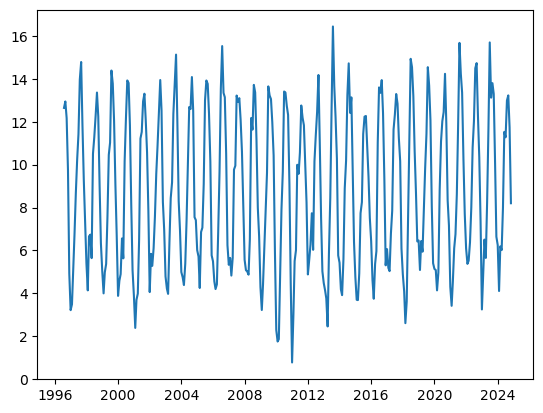

In [70]:
# Mean temperature for each month
plt.plot(monthly_mean_temp)
plt.show()

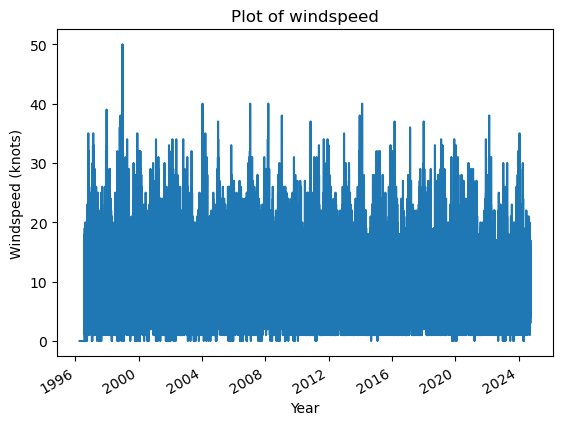

In [72]:
# Plot the windspeed
weather_df['wdsp'].plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Plot of windspeed')
plt.show()

In [ ]:
# Rolling wdsp
rolling_wind = daily['wdsp'].rolling('3D').mean()
rolling_wind

date        date               
1996-04-10  1996-04-10 14:00:00    0.000000
1996-07-31  1996-07-31 08:00:00    0.000000
            1996-07-31 09:00:00    0.000000
            1996-07-31 10:00:00    0.000000
            1996-07-31 11:00:00    0.000000
                                     ...   
2024-09-30  2024-09-30 20:00:00    7.523810
            2024-09-30 21:00:00    7.409091
            2024-09-30 22:00:00    7.347826
            2024-09-30 23:00:00    7.291667
2024-10-01  2024-10-01 00:00:00    6.000000
Name: wdsp, Length: 246880, dtype: float64

In [83]:
# Max windspeed for each day

max_daily_windspeed = daily['wdsp'].max()

max_daily_windspeed



date
1996-04-10     0.0
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
              ... 
2024-09-27    15.0
2024-09-28     8.0
2024-09-29    17.0
2024-09-30    12.0
2024-10-01     6.0
Freq: D, Name: wdsp, Length: 10402, dtype: float64

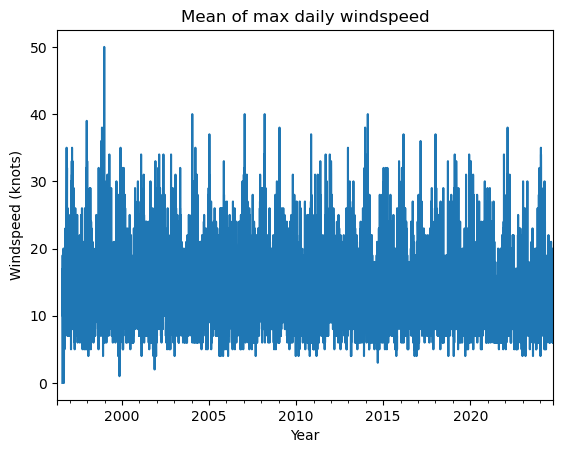

In [85]:
max_daily_windspeed.plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Mean of max daily windspeed')
plt.show()

In [87]:
max_daily_windspeed = pd.DataFrame(max_daily_windspeed)
max_daily_windspeed

,wdsp
date,
1996-04-10,0.0
1996-04-11,NaN
1996-04-12,NaN
1996-04-13,NaN
1996-04-14,NaN
...,...
2024-09-27,15.0
2024-09-28,8.0
2024-09-29,17.0


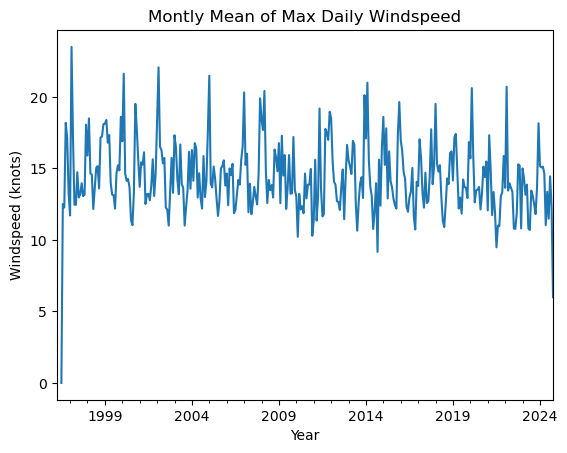

In [89]:
# Monthly mean of the daily max windspeeds

monthly_mean = max_daily_windspeed.resample('ME')

monthly_mean = monthly_mean['wdsp'].mean()
monthly_mean.plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Montly Mean of Max Daily Windspeed')
plt.show()